# instalando e importando as biblitecas  

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Definir periodo

In [6]:
start_date = '2007-01-01'
end_date = '2023-12-20'

# Extrair e manipular dados

In [8]:
# obter os dados do ibovespa e dólar em Reais
ibov_data = yf.download('^BVSP', start=start_date, end=end_date)['Close']

usd_brl_data = yf.download('USDBRL=X', start=start_date, end=end_date)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
ibov_data

Ticker,^BVSP
Date,
2007-01-02,45383.0
2007-01-03,44445.0
2007-01-04,44020.0
2007-01-05,42245.0
2007-01-08,42830.0
...,...
2023-12-13,129465.0
2023-12-14,130842.0
2023-12-15,130197.0


In [10]:
ibov_df = pd.DataFrame(ibov_data)
ibov_df.columns = ['IBOV']


usd_brl_df = pd.DataFrame(usd_brl_data)
usd_brl_df.columns = ['USDBRL']

In [11]:
ibov_usd = pd.merge(ibov_df,
                    usd_brl_df,
                    left_index=True,
                    right_index=True,
                    how = 'inner'
                    )

In [12]:
# divindo o ibovespa pelo dólar, para obter o ibovespa dolarizado
ibov_usd ['IBOV_USD'] = ibov_usd['IBOV'] / ibov_usd['USDBRL']
ibov_usd

,IBOV,USDBRL,IBOV_USD
Date,,,
2007-01-02,45383.0,2.131000,21296.573959
2007-01-03,44445.0,2.134500,20822.206345
2007-01-04,44020.0,2.139000,20579.710732
2007-01-05,42245.0,2.147000,19676.291819
2007-01-08,42830.0,2.146500,19953.411504
...,...,...,...
2023-12-13,129465.0,4.964500,26078.155160
2023-12-14,130842.0,4.918400,26602.554699
2023-12-15,130197.0,4.914600,26491.881897


# Plot

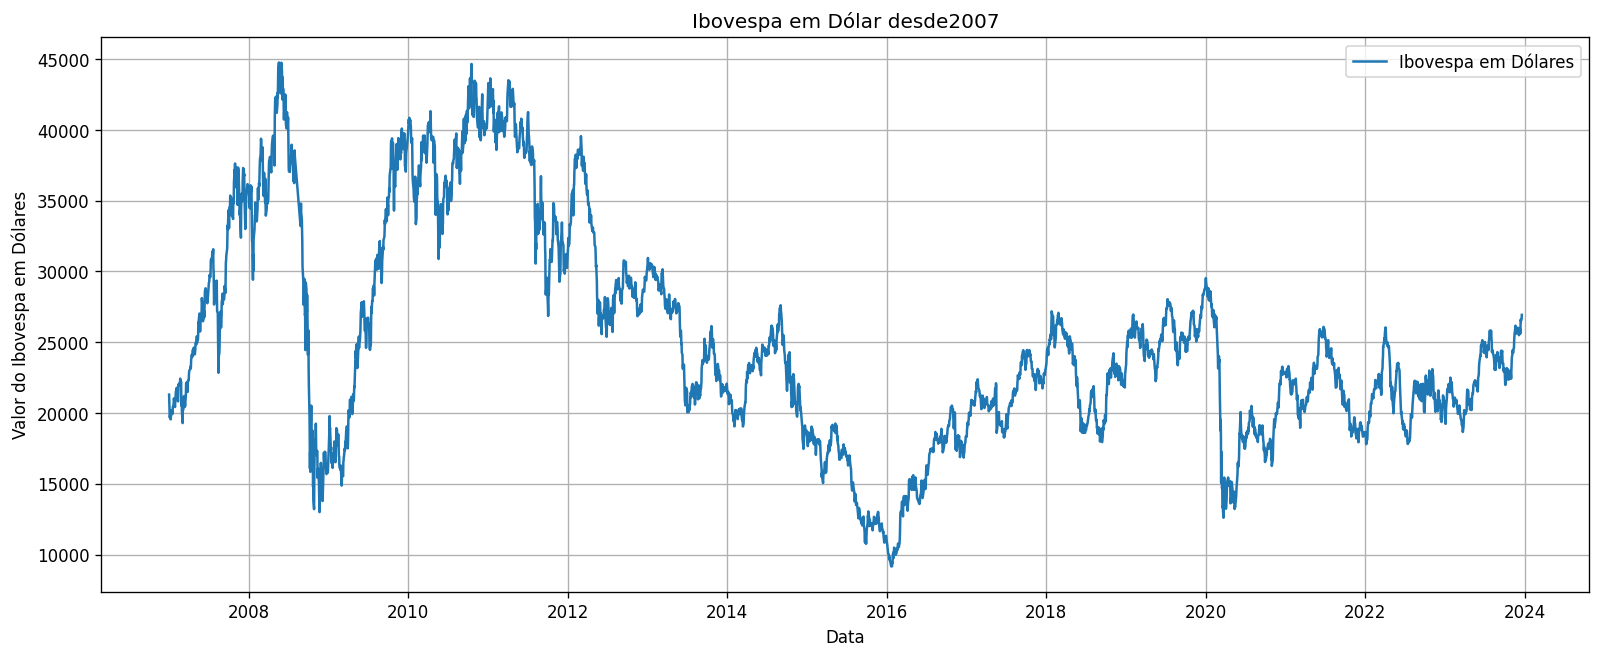

In [13]:
plt .figure(figsize = (16,6), dpi = 120)
plt.plot(ibov_usd.index, ibov_usd['IBOV_USD'], label= 'Ibovespa em Dólares')
plt.xlabel('Data')
plt.ylabel('Valor do Ibovespa em Dólares')
plt.title('Ibovespa em Dólar desde' + start_date [:4])
plt.legend()
plt.grid(True)
plt.show()

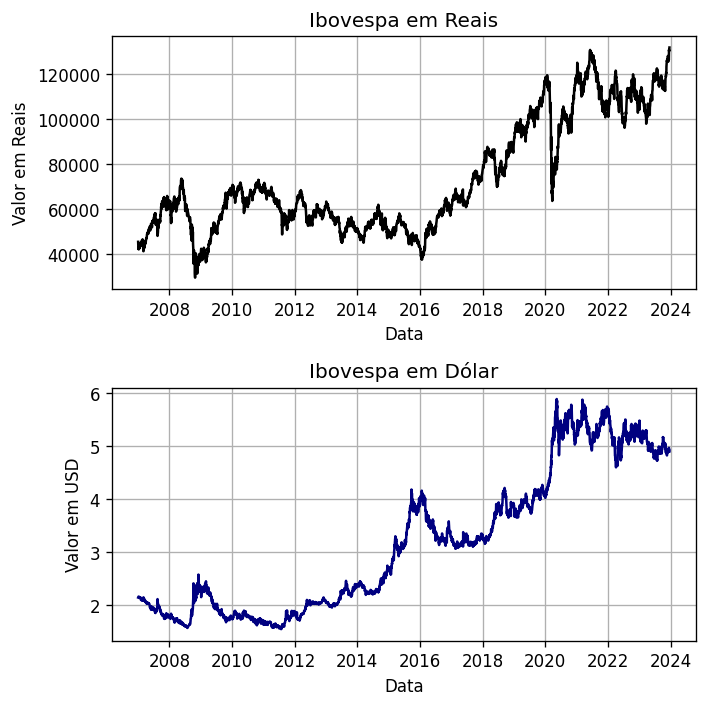

In [14]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (6,6), dpi = 120)

# plot do primeiro gráfico
ax1.plot(ibov_usd.index, ibov_usd['IBOV'], label = ('Ibovespa em Reais'), color ='black')
ax1.set_xlabel('Data')
ax1.set_ylabel('Valor em Reais')
ax1.set_title('Ibovespa em Reais')
ax1.grid(True)


# plot do segundo gráfico
ax2.plot(ibov_usd.index, ibov_usd['USDBRL'], label = ('Ibovespa em Dólares'), color ='navy')
ax2.set_xlabel('Data')
ax2.set_ylabel('Valor em USD')
ax2.set_title('Ibovespa em Dólar')
ax2.grid(True)

# ajustado os gráficos
plt.tight_layout()
plt.show()